## 2.1. pandas 맛보기
### 2.1.2 데이터 불러오기 (pd.read_excel)

In [16]:
import pandas as pd
import numpy as np

In [8]:
sample_1 = pd.read_excel('./files/sample_1.xlsx')
sample_1
# defaoult 값으로 첫 번쪠 로우를 컬럼으로 생기는 문제 unnamed

,2019년 11월 입국객 수,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,국적코드,성별,입국객수,전년동기
1,A01,남성,106320,85815
2,A01,여성,191436,125241
3,A31,남성,319,299
4,A31,여성,42,54
5,A18,남성,158912,124486
6,A18,여성,232943,163466
7,총 합계,689972,NaN,NaN
8,전년동기,499361,NaN,NaN


In [9]:
# 인덱스 1번 로우를 헤더로
sample_1 = pd.read_excel('./files/sample_1.xlsx', header = 1)
sample_1

,국적코드,성별,입국객수,전년동기
0,A01,남성,106320.0,85815.0
1,A01,여성,191436.0,125241.0
2,A31,남성,319.0,299.0
3,A31,여성,42.0,54.0
4,A18,남성,158912.0,124486.0
5,A18,여성,232943.0,163466.0
6,총 합계,689972,NaN,NaN
7,전년동기,499361,NaN,NaN


In [22]:
sample_1 = pd.read_excel('./files/sample_1.xlsx', 
                         header = 1, 
                         usecols = 'A:C',         # 1~3번쪠 컬럼먼 사용
                        skipfooter = 2,           # 밑에서 부터 2줄 삭제
                        names = ['A', 'B', 'C'])  # 컬럼명 변경
print(sample_1.dtypes)
print(sample_1)

A    object
B    object
C     int64
dtype: object
     A   B       C
0  A01  남성  106320
1  A01  여성  191436
2  A31  남성     319
3  A31  여성      42
4  A18  남성  158912
5  A18  여성  232943


In [27]:
sample_1 = pd.read_excel('./files/sample_1.xlsx', 
                         header = 1, 
                         usecols = 'A:C',         # 1~3번쪠 컬럼먼 사용
                        skipfooter = 2,           # 밑에서 부터 2줄 삭제
                        dtype = {'입국객수' : np.float64})  # 컬럼형 변환
print(sample_1.dtypes)
sample_1

국적코드     object
성별       object
입국객수    float64
dtype: object


,국적코드,성별,입국객수
0,A01,남성,106320.0
1,A01,여성,191436.0
2,A31,남성,319.0
3,A31,여성,42.0
4,A18,남성,158912.0
5,A18,여성,232943.0


### 웹에 있는 csv 읽어오기

In [30]:
fish = pd.read_csv('https://bit.ly/fish_csv',
                  encoding = 'utf-8')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


- info() 함수 사용

In [35]:
# sample_1.head()
# sample_1.tail()
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국적코드    6 non-null      object 
 1   성별      6 non-null      object 
 2   입국객수    6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [36]:
type(sample_1)

pandas.core.frame.DataFrame

In [38]:
sample_1.index # 인덱스 범위

RangeIndex(start=0, stop=6, step=1)

In [39]:
sample_1.columns

Index(['국적코드', '성별', '입국객수'], dtype='object')

In [40]:
sample_1.dtypes

국적코드     object
성별       object
입국객수    float64
dtype: object

In [42]:
sample_1.describe() # 연속형 자료 numeric 숫자형 데이터의 여러 정보를 요약해줌 5넘버 summary
sample_1['성별'].value_counts() # 범주형 자료, 이산형 자료에 대해서 

남성    3
여성    3
Name: 성별, dtype: int64

In [43]:
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320.0
1,A01,여성,191436.0
2,A31,남성,319.0
3,A31,여성,42.0
4,A18,남성,158912.0
5,A18,여성,232943.0


In [44]:
# 원하는 컬럼만 뽑기
sample_1['입국객수']

0    106320.0
1    191436.0
2       319.0
3        42.0
4    158912.0
5    232943.0
Name: 입국객수, dtype: float64

In [45]:
# 2개이상 컬럼만 뽑고 싶을 때
sample_1[['국적코드', '성별']]

,국적코드,성별
0,A01,남성
1,A01,여성
2,A31,남성
3,A31,여성
4,A18,남성
5,A18,여성


In [47]:
# 새로운 컬럼을 추가하고 싶을 때
sample_1['기준년월'] = '2019-11'

sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320.0,2019-11
1,A01,여성,191436.0,2019-11
2,A31,남성,319.0,2019-11
3,A31,여성,42.0,2019-11
4,A18,남성,158912.0,2019-11
5,A18,여성,232943.0,2019-11


In [56]:
condition = (sample_1['성별'] == '남성') # 조건
print(condition)
print(~condition)    #  tilde 틸다 사용해서 반대 조건을 만들 수 있다.
sample_1[condition]

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool
0    False
1     True
2    False
3     True
4    False
5     True
Name: 성별, dtype: bool


,국적코드,성별,입국객수,기준년월
0,A01,남성,106320.0,2019-11
2,A31,남성,319.0,2019-11
4,A18,남성,158912.0,2019-11


In [59]:
condition = (sample_1['입국객수'] > 150000)
print(condition)
sample_1[condition]

0    False
1     True
2    False
3    False
4     True
5     True
Name: 입국객수, dtype: bool


,국적코드,성별,입국객수,기준년월
1,A01,여성,191436.0,2019-11
4,A18,남성,158912.0,2019-11
5,A18,여성,232943.0,2019-11


In [65]:
condition_1 = (sample_1['성별'] == '남성')
condition_2 = (sample_1['입국객수'] >= 150000)
print(condition_1)
print(condition_2)
print(condition_1 & condition_2)

# 아래 두 방법은 동일하다
conditions = condition_1 & condition_2
conditions = (sample_1['성별'] == '남성') & (sample_1['입국객수'] >= 150000)

sample_1[conditions]

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool
0    False
1     True
2    False
3    False
4     True
5     True
Name: 입국객수, dtype: bool
0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool


,국적코드,성별,입국객수,기준년월
4,A18,남성,158912.0,2019-11


In [66]:
condition = (sample_1['국적코드'] == 'A01') | \
                (sample_1['국적코드'] == 'A18')
print(condition)

0     True
1     True
2    False
3    False
4     True
5     True
Name: 국적코드, dtype: bool


In [67]:
# isin() 이라는 메서드를 사용하면 편하다.
conditions = (sample_1['국적코드'].isin(['A01', 'A31']))
print(conditions)

0     True
1     True
2     True
3     True
4    False
5    False
Name: 국적코드, dtype: bool


In [74]:
sample_1.loc[1:3,['국적코드', '입국객수', '성별']]

,국적코드,입국객수,성별
1,A01,191436.0,여성
2,A31,319.0,남성
3,A31,42.0,여성


In [75]:
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320.0,2019-11
1,A01,여성,191436.0,2019-11
2,A31,남성,319.0,2019-11
3,A31,여성,42.0,2019-11
4,A18,남성,158912.0,2019-11
5,A18,여성,232943.0,2019-11


In [78]:
code_master = pd.read_excel('./files/sample_codemaster.xlsx',
                           header = 0,
                           usecols = 'A:B',
                           skipfooter = 0)

code_master.head()

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란


In [79]:
sample_1.head()

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320.0,2019-11
1,A01,여성,191436.0,2019-11
2,A31,남성,319.0,2019-11
3,A31,여성,42.0,2019-11
4,A18,남성,158912.0,2019-11


In [84]:
sample_1_code = pd.merge(left = sample_1,
                         right = code_master,
                        how = 'left',           # left를 기준으로 해서 병합한다.
                        on = '국적코드')  

sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국


In [86]:
sample_1_code = pd.merge(left = sample_1,
                         right = code_master,
                        how = 'right',           # left를 기준으로 해서 병합한다.
                        left_on = '국적코드',
                        right_on = '국적코드')  

sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A02,NaN,NaN,NaN,대만
3,A03,NaN,NaN,NaN,홍콩
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국
6,A19,NaN,NaN,NaN,이란
7,A22,NaN,NaN,NaN,우즈베키스탄
8,A23,NaN,NaN,NaN,카자흐스탄
9,A99,NaN,NaN,NaN,아시아 기타


In [87]:
sample_1_code = pd.merge(left = sample_1,
                         right = code_master,
                        how = 'inner',           # 교집합 NaN 값 제거
                        on = '국적코드')  

sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A18,남성,158912.0,2019-11,중국
3,A18,여성,232943.0,2019-11,중국


In [90]:
sample_1_code = pd.merge(left = sample_1,
                         right = code_master,
                        how = 'left',           # 합집합
                        on = '국적코드')  

sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국


In [102]:
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국


In [103]:
sample_2_code = pd.read_excel('./files/sample_2.xlsx',
                             header = 1,
                             usecols = 'A:C',
                             skipfooter = 2)

sample_2_code['기준년월'] = '2019-12'

sample_2_code = pd.merge(left = sample_2_code,
                        right = code_master,
                        how = 'left',
                        left_on = '국적코드',
                        right_on = '국적코드')
sample_2_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [106]:
# 위아래로 병합 append() 함수를 사용한다.
sample = sample_1_code.append(sample_2_code) # ignore_index를 True로 해주지 않으니 인덱스가 자동으로 생성되지 않는다.
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국
0,A01,남성,92556.0,2019-12,일본
1,A01,여성,163737.0,2019-12,일본
2,A18,남성,155540.0,2019-12,중국
3,A18,여성,249023.0,2019-12,중국


In [107]:
# 위아래로 병합 append() 함수를 사용한다.
sample = sample_1_code.append(sample_2_code, ignore_index=True)
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국
6,A01,남성,92556.0,2019-12,일본
7,A01,여성,163737.0,2019-12,일본
8,A18,남성,155540.0,2019-12,중국
9,A18,여성,249023.0,2019-12,중국


In [112]:
# concat 함수 사용 이 방식이 조금 더 빠르다.
sample_concat = pd.concat([sample_1_code, sample_2_code], 
                          ignore_index=True,
                           axis = 0) # 세로로 붙인다. 위아래로
sample_concat

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320.0,2019-11,일본
1,A01,여성,191436.0,2019-11,일본
2,A31,남성,319.0,2019-11,NaN
3,A31,여성,42.0,2019-11,NaN
4,A18,남성,158912.0,2019-11,중국
5,A18,여성,232943.0,2019-11,중국
6,A01,남성,92556.0,2019-12,일본
7,A01,여성,163737.0,2019-12,일본
8,A18,남성,155540.0,2019-12,중국
9,A18,여성,249023.0,2019-12,중국


In [117]:
sample.to_excel('./files/sample_calss.xlsx',
               index = False, # 인덱스는 무시하라
               na_rep = 'NaN', # 빈칸을 표현해라
               sheet_name = 'mysheet') # sheet_name 변경하기

### 하나의 파일에 여러 sheet 작성하기

In [118]:
with pd.ExcelWriter('./files/multiple_sheet.xlsx') as writer:
    sample.to_excel(writer, sheet_name = 'my_sheet1')
    sample.to_excel(writer, sheet_name = 'my_sheet2',
                   index = False,
                   na_rep = 'NaN')

In [130]:
## 피벗 테이블
sample_pivot = sample.pivot_table(
                values = '입국객수',   # 기준데이터
                index = '국적명',
                columns = '기준년월',  # 
                aggfunc = 'mean')      # 기본값이 mean


sample_pivot

기준년월,2019-11,2019-12
국적명,,
일본,148878.0,128146.5
중국,195927.5,202281.5


<AxesSubplot:xlabel='국적명'>

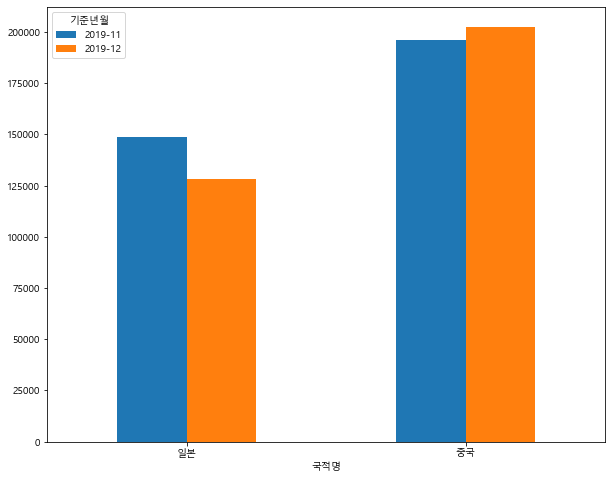

In [134]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # 한글폰트 사용시 에러 해결

sample_pivot.plot(kind ='bar',
                 figsize = (10,8),
                 rot = 0)

In [145]:
sample.groupby('성별')['입국객수'].mean()

성별
남성    102729.4
여성    167436.2
Name: 입국객수, dtype: float64